## Plotting Steronets

Thanks to https://github.com/joferkington/mplstereonet

See https://nbviewer.jupyter.org/github/ondrolexa/apsg/blob/master/examples/apsg_tutorial.ipynb for an alternative with other nice things...

or http://geopytool.com/installation-expert.html for this plus some geochem plots

In [ ]:
import matplotlib.pyplot as plt
import mplstereonet
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')


ddir=135
strike, dip = ((45,45))
ax.plane(strike, dip, 'g-', linewidth=2)
ax.pole(strike, dip, 'g^', markersize=18)
ax.rake(strike, dip, -25)
ax.grid()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplstereonet

fig, ax = mplstereonet.subplots()

strike, dip = 90, 80
num = 10
strikes = strike + 10 * np.random.randn(num)
dips = dip + 10 * np.random.randn(num)

cax = ax.density_contourf(strikes, dips, measurement='poles')

ax.pole(strikes, dips)
ax.grid(True)
fig.colorbar(cax)

plt.show()

In [ ]:
"""
Basic quadrant, strike/dip, and rake parsing.
`mplstereonet` expects measurements to follow the
"right-hand-rule" (RHR) to indicate dip direction.
If you have a set of measurements that don't necessarily follow the RHR, there
are a number of parsing and standardization functions in `mplstereonet` to
correct for this.
"""
import mplstereonet

print('Parse quadrant azimuth measurements')
for original in ['N30E', 'E30N', 'W10S', 'N 10 W']:
    azi = mplstereonet.parse_quadrant_measurement(original)
    print('"{}" --> {:.1f}'.format(original, azi))

print('\nParse quadrant strike/dip measurements.')
print('Note that the output follows the right-hand-rule.')

def parse_sd(original, seperator):
    strike, dip = mplstereonet.parse_strike_dip(*original.split(seperator))
    print('"{}" --> Strike: {:.1f}, Dip: {:.1f}'.format(original, strike, dip))

parse_sd('215/10', '/')
parse_sd('215/10E', '/')
parse_sd('215/10NW', '/')
parse_sd('N30E/45NW', '/')
parse_sd('E10N\t20 N', '\t')
parse_sd('W30N/46.7 S', '/')

print("\nSimilarly, you can parse rake measurements that don't follow the RHR.")

def split_rake(original, sep1=None, sep2=None):
    components = original.split(sep1)
    if len(components) == 3:
        return components
    strike, rest = components
    dip, rake = rest.split(sep2)
    return strike, dip, rake

def display_rake(original, sep1, sep2=None):
    components = split_rake(original, sep1, sep2)
    strike, dip, rake = mplstereonet.parse_rake(*components)
    template = '"{}" --> Strike: {:.1f}, Dip: {:.1f}, Rake: {:.1f}'
    print(template.format(original, strike, dip, rake))

original = 'N30E/45NW 10NE'
display_rake(original, '/')

original = '210 45\t30N'
display_rake(original, None)

original = 'N30E/45NW raking 10SW'
display_rake(original, '/', 'raking')

In [ ]:
import pandas as pd
orientations=pd.read_csv('../test_data3/output/orientations.csv',",")

In [ ]:
display(orientations)

In [ ]:
display(orientations["dip"].values)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplstereonet
import random

all_sorts=pd.read_csv('../test_data3/tmp/all_sorts_clean.csv',",")
formations=all_sorts['code']
#display(formations)

y=0
for fm in formations:
    orientations2=orientations[orientations["formation"]==fm]
    if(len(orientations2)>0):
        fig, ax = mplstereonet.subplots()
        y=y+10
        strikes = orientations2["azimuth"].values -90
        dips = orientations2["dip"].values
        
        #cax = ax.density_contourf(strikes, dips, measurement='poles')
        r=random.random()
        b=random.random()
        g=random.random()
        print(fm,"observations n=",len(orientations2),r,b,g)
        ax.pole(strikes, dips, markersize=4, color=(r,b,g))
        ax.grid(True)
        #fig.colorbar(cax)
        text = ax.text(1200, 600, fm, color=(r,b,g))

        plt.show()



In [ ]:
display(orientations2["azimuth"].values)

In [ ]:
display(orientations2["dip"].values)

## check accruacy of plot strike vs azimuth!!

-----------------------------------------------
Wyloo_Group


,X,Y,Z,azimuth,dip,polarity,formation
114,507893.288924,7.457420e+06,297.0,16,25,1,P__WYa_st


P__WYa_st observations n= 1


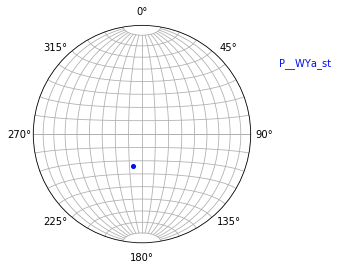

,X,Y,Z,azimuth,dip,polarity,formation
3,503404.331934,7.460230e+06,301.0,182,45,1,P__WYd_kd


P__WYd_kd observations n= 1


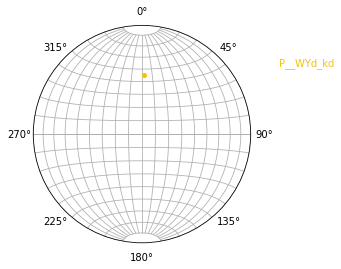

,X,Y,Z,azimuth,dip,polarity,formation
2,504669.323074,7.461017e+06,339.0,181,70,1,P__WYm_sp


P__WYm_sp observations n= 1


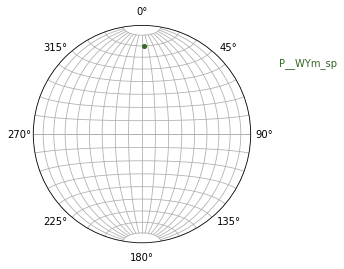

-----------------------------------------------
Shingle_Creek_Group


,X,Y,Z,azimuth,dip,polarity,formation
4,517319.479838,7.458552e+06,349.0,199,10,1,P__SKq_stq
9,503809.705274,7.463490e+06,324.0,3,68,1,P__SKq_stq
10,502536.429960,7.468201e+06,398.0,213,16,1,P__SKq_stq
11,502536.419086,7.469580e+06,365.0,186,12,1,P__SKq_stq
13,507187.876941,7.468501e+06,497.0,216,10,1,P__SKq_stq


P__SKq_stq observations n= 5


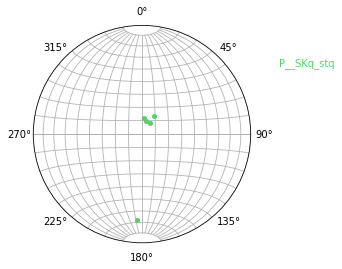

,X,Y,Z,azimuth,dip,polarity,formation


-----------------------------------------------
Turee_Creek_Group


,X,Y,Z,azimuth,dip,polarity,formation


,X,Y,Z,azimuth,dip,polarity,formation


,X,Y,Z,azimuth,dip,polarity,formation
7,507945.284967,7.467496e+06,328.0,203,58,1,P__TKk_sf
8,503517.659190,7.466604e+06,362.0,0,60,1,P__TKk_sf
12,503306.793169,7.465432e+06,305.0,360,82,1,P__TKk_sf


P__TKk_sf observations n= 3


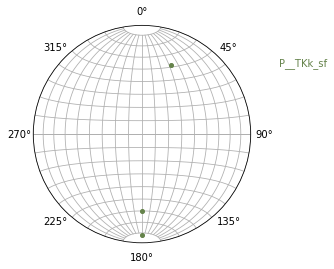

,X,Y,Z,azimuth,dip,polarity,formation
5,516865.384903,7.458957e+06,336.0,227,45,1,P__TK_s
20,506680.480131,7.502449e+06,479.0,356,28,1,P__TK_s


P__TK_s observations n= 2


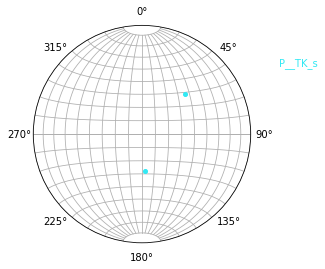

-----------------------------------------------
Hamersley_Group


,X,Y,Z,azimuth,dip,polarity,formation
64,555431.832259,7.486296e+06,600.0,22,50,1,P__HAo_ci


P__HAo_ci observations n= 1


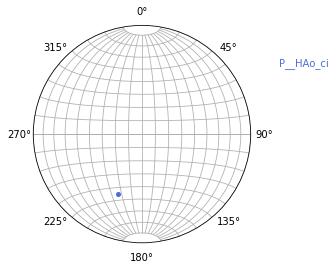

,X,Y,Z,azimuth,dip,polarity,formation


,X,Y,Z,azimuth,dip,polarity,formation
6,515438.181521,7.463725e+06,341.0,359,44,1,P__HAj_xci_od
65,554774.521254,7.485480e+06,566.0,24,70,1,P__HAj_xci_od
67,559041.563856,7.491265e+06,582.0,168,48,1,P__HAj_xci_od


P__HAj_xci_od observations n= 3


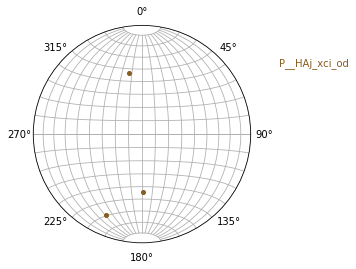

,X,Y,Z,azimuth,dip,polarity,formation
21,521831.648011,7.509302e+06,581.0,185,52,1,P__HAb_cib
28,519044.042090,7.542043e+06,792.0,354,10,1,P__HAb_cib
40,536605.437991,7.516555e+06,895.0,349,25,1,P__HAb_cib
41,536725.996261,7.516341e+06,713.0,201,54,1,P__HAb_cib
42,537098.433652,7.516637e+06,713.0,33,19,1,P__HAb_cib
43,535718.019294,7.512485e+06,645.0,203,32,1,P__HAb_cib
44,538686.833859,7.511718e+06,646.0,191,9,1,P__HAb_cib
45,540927.056601,7.507144e+06,661.0,317,26,1,P__HAb_cib
80,547505.968669,7.536845e+06,640.0,43,24,1,P__HAb_cib
81,553608.057369,7.538143e+06,658.0,46,20,1,P__HAb_cib


P__HAb_cib observations n= 16


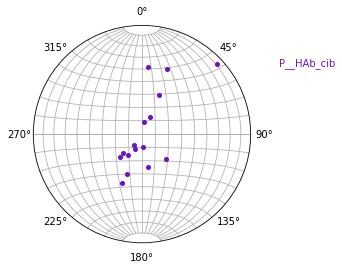

,X,Y,Z,azimuth,dip,polarity,formation
19,522302.816646,7.500351e+06,584.0,343,29,1,A_HAS_xsl_ci
39,529878.889789,7.517250e+06,672.0,211,24,1,A_HAS_xsl_ci
71,544783.454596,7.514188e+06,776.0,80,35,1,A_HAS_xsl_ci
72,544569.825715,7.513964e+06,776.0,220,33,1,A_HAS_xsl_ci
76,548617.886639,7.517020e+06,820.0,172,25,1,A_HAS_xsl_ci
88,567997.525922,7.495674e+06,625.0,88,42,1,A_HAS_xsl_ci


A_HAS_xsl_ci observations n= 6


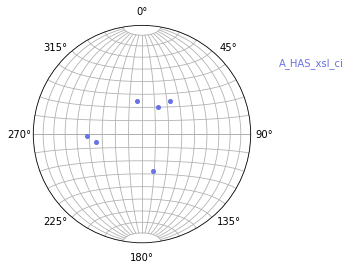

,X,Y,Z,azimuth,dip,polarity,formation
73,547193.675406,7.515969e+06,862.0,307,28,1,A_HAd_kd
74,547566.130420,7.513739e+06,622.0,5,34,1,A_HAd_kd
83,571120.622839,7.560760e+06,473.0,135,6,1,A_HAd_kd


A_HAd_kd observations n= 3


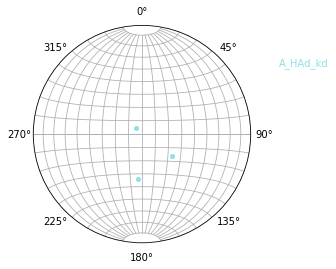

,X,Y,Z,azimuth,dip,polarity,formation
22,512448.407034,7.509768e+06,551.0,198,52,1,A_HAm_cib
30,542044.728887,7.531756e+06,589.0,14,5,1,A_HAm_cib
31,538856.722317,7.532189e+06,603.0,55,14,1,A_HAm_cib
32,533510.520903,7.532566e+06,612.0,223,8,1,A_HAm_cib
34,531127.773077,7.532018e+06,570.0,313,20,1,A_HAm_cib
36,526028.098467,7.531016e+06,571.0,27,18,1,A_HAm_cib
38,538013.208028,7.522087e+06,602.0,180,33,1,A_HAm_cib
46,528563.824324,7.500587e+06,572.0,290,41,1,A_HAm_cib
77,548338.540710,7.531498e+06,633.0,192,5,1,A_HAm_cib
78,547385.416583,7.530901e+06,623.0,19,15,1,A_HAm_cib


A_HAm_cib observations n= 13


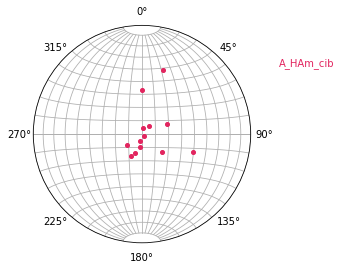

-----------------------------------------------
Fortescue_Group


,X,Y,Z,azimuth,dip,polarity,formation
14,517107.033676,7.468722e+06,472.0,207,70,1,A_FOj_xs_b
18,507595.338162,7.487654e+06,497.0,317,15,1,A_FOj_xs_b
25,518496.741247,7.528507e+06,506.0,20,16,1,A_FOj_xs_b
26,519668.728521,7.529597e+06,524.0,11,20,1,A_FOj_xs_b
27,521996.558791,7.530797e+06,559.0,19,14,1,A_FOj_xs_b
29,540050.867785,7.529734e+06,614.0,12,9,1,A_FOj_xs_b
33,531631.728649,7.530682e+06,596.0,338,37,1,A_FOj_xs_b
35,530421.174134,7.530013e+06,628.0,324,15,1,A_FOj_xs_b
37,534995.069672,7.527598e+06,560.0,349,14,1,A_FOj_xs_b
57,530240.225370,7.460266e+06,402.0,341,45,1,A_FOj_xs_b


A_FOj_xs_b observations n= 21


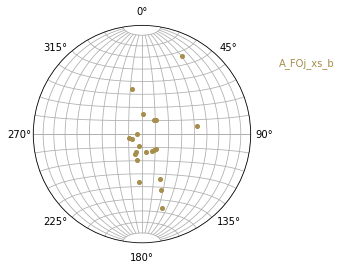

,X,Y,Z,azimuth,dip,polarity,formation


,X,Y,Z,azimuth,dip,polarity,formation


,X,Y,Z,azimuth,dip,polarity,formation
15,517762.214124,7.470059e+06,369.0,207,51,1,A_FOu_bbo
23,515006.838995,7.524810e+06,535.0,77,8,1,A_FOu_bbo
24,510218.912801,7.523642e+06,532.0,16,20,1,A_FOu_bbo
47,535208.290603,7.498961e+06,509.0,355,40,1,A_FOu_bbo
63,553646.149832,7.482643e+06,512.0,30,40,1,A_FOu_bbo
70,562525.435066,7.506596e+06,789.0,250,11,1,A_FOu_bbo
89,575052.803356,7.498534e+06,732.0,212,10,1,A_FOu_bbo
108,591851.385524,7.504229e+06,741.0,78,9,1,A_FOu_bbo
109,593940.170780,7.506536e+06,707.0,69,12,1,A_FOu_bbo


A_FOu_bbo observations n= 9


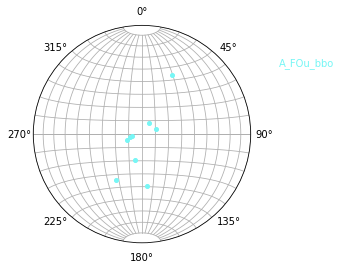

,X,Y,Z,azimuth,dip,polarity,formation
17,513032.899812,7.482922e+06,414.0,318,15,1,A_FOp_bs
54,540784.731185,7.464544e+06,408.0,183,40,1,A_FOp_bs
56,529500.738026,7.466242e+06,447.0,203,58,1,A_FOp_bs
62,550491.005745,7.482013e+06,518.0,30,46,1,A_FOp_bs
66,544268.348172,7.484998e+06,520.0,19,50,1,A_FOp_bs
87,570632.369052,7.510870e+06,639.0,201,20,1,A_FOp_bs
94,583959.610576,7.468823e+06,726.0,303,14,1,A_FOp_bs


A_FOp_bs observations n= 7


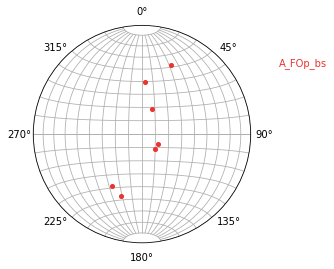

,X,Y,Z,azimuth,dip,polarity,formation


,X,Y,Z,azimuth,dip,polarity,formation
0,530083.185332,7.485330e+06,413.0,8,55,1,A_FOh_xs_f
1,532466.058612,7.483852e+06,422.0,10,40,1,A_FOh_xs_f
16,522004.807902,7.478031e+06,400.0,273,30,1,A_FOh_xs_f
48,542701.745304,7.483245e+06,488.0,14,35,1,A_FOh_xs_f
49,525682.682412,7.481645e+06,399.0,331,20,1,A_FOh_xs_f
50,524499.576028,7.473215e+06,401.0,242,27,1,A_FOh_xs_f
51,528492.836790,7.469545e+06,431.0,211,24,1,A_FOh_xs_f
53,543008.608580,7.470252e+06,432.0,125,15,1,A_FOh_xs_f
55,536199.958039,7.467392e+06,472.0,182,45,1,A_FOh_xs_f
59,545084.605891,7.475582e+06,454.0,76,35,1,A_FOh_xs_f


A_FOh_xs_f observations n= 20


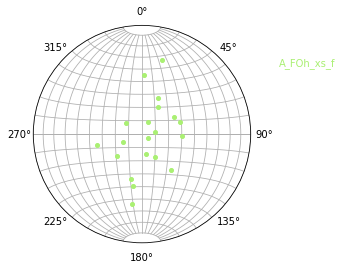

,X,Y,Z,azimuth,dip,polarity,formation


-----------------------------------------------
A_s_PMI


,X,Y,Z,azimuth,dip,polarity,formation
102,595435.314657,7.474700e+06,721.0,210,80,1,A_s_PMI
103,595495.620105,7.473501e+06,618.0,182,35,1,A_s_PMI


A_s_PMI observations n= 2


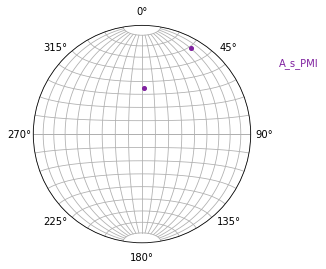

-----------------------------------------------
A_mgn_PMI


,X,Y,Z,azimuth,dip,polarity,formation


-----------------------------------------------
A_mgn_PRK


,X,Y,Z,azimuth,dip,polarity,formation


-----------------------------------------------
A_s_PRK


,X,Y,Z,azimuth,dip,polarity,formation


-----------------------------------------------
A_b_PRK


,X,Y,Z,azimuth,dip,polarity,formation
52,540587.461736,7.470219e+06,462.0,147,60,1,A_b_PRK


A_b_PRK observations n= 1


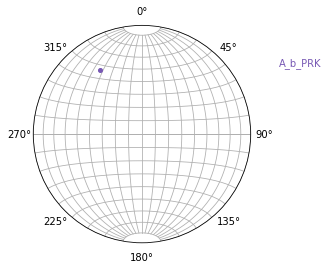

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mplstereonet
import random
import pandas as pd
%matplotlib inline

orientations=pd.read_csv('../test_data3/output/orientations.csv',",")
all_sorts=pd.read_csv('../test_data3/tmp/all_sorts.csv',",")
groups=all_sorts['group'].unique()
#display(formations)


for gp in groups:
    all_sorts2=all_sorts[all_sorts["group"]==gp]
    all_sorts2.set_index('code',  inplace = True)

    print("-----------------------------------------------")
    print(gp)
    #display(all_sorts2)
    for indx,as2 in all_sorts2.iterrows():
        orientations2=orientations[orientations["formation"]==indx]
        display(orientations2)
        if(len(orientations2)>0):
            fig, ax = mplstereonet.subplots()
            strikes = orientations2["azimuth"].values -90
            dips = orientations2["dip"].values

            #cax = ax.density_contourf(strikes, dips, measurement='poles')
            r=random.random()
            b=random.random()
            g=random.random()
            print(indx,"observations n=",len(orientations2))
            ax.pole(strikes, dips, markersize=4, color=(r,b,g))
            ax.grid(True)
            #fig.colorbar(cax)
            text = ax.text(1200, 600, indx, color=(r,b,g))

            plt.show()

